In [1]:
from cev_analysis import *
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

In [2]:
file = "./listado-de-evaluadores-externos.csv"
df = CEV().consultor_dataframe(file)
df.head()

,Llamado,Nombre,Profesión,Región,Correo electrónico,Teléfono
0,1,Adelqui Fissore Schiappacasse,Ingeniero Civil Mecánico,Biobío,afissore@udec.cl,(+56 9)79887005
1,1,Antonio Javier Menéndez Ferrer,Arquitecto,Valparaíso,ajmf@rearquitectura.cl,(+56 9)96190840
2,1,Cristian Wolleter Eguiguren,Ingeniero Civil,Metropolitana,cristian@efizity.com,(+56 9)66271645
3,1,Diego Palma Rojas,Arquitecto,Metropolitana,dapalma@uc.cl,(+56 2)29515975
4,1,Felipe Encinas Pino,Arquitecto,Metropolitana,felipe.encinas@uc.cl,(+56 2)23545584


In [3]:
print(f"El total de evaluadores externos acreditados hasta el llamado {df['Llamado'].unique()[-1]} es de: {df.shape[0]}")

El total de evaluadores externos acreditados hasta el llamado 12 - 2S 2020 es de: 806


### **1. Participación por regiones**

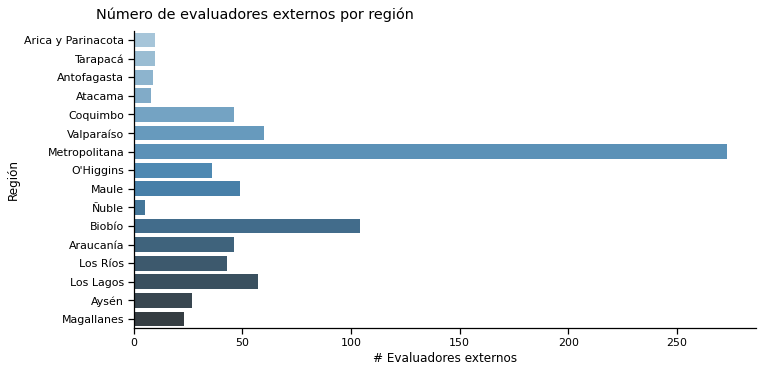

El top 5  de regiones con mayor participación:
Metropolitana    273
Biobío           104
Valparaíso        60
Los Lagos         57
Maule             49
Name: Región, dtype: int64
Estas 5 regiones componen el 67.0% del total nacional.


In [4]:
sns.set_context('notebook')
#g = sns.catplot(y='Región', data=df, kind='count', hue='Llamado', palette= 'Blues_d')
g = sns.catplot(y='Región', data=df, kind='count', palette= 'Blues_d')
g.fig.suptitle("Número de evaluadores externos por región", y=1.03)
g.set(ylabel="Región", xlabel="# Evaluadores externos") 
g.fig.set_size_inches(15,5)
plt.show()
print(f"El top 5  de regiones con mayor participación:")
print(f"{df['Región'].value_counts(normalize=False)[:5]}")
print(f"Estas 5 regiones componen el {df['Región'].value_counts(normalize=True)[:5].sum().round(2) * 100}% del total nacional.")

### **2. Acreditación por llamado**

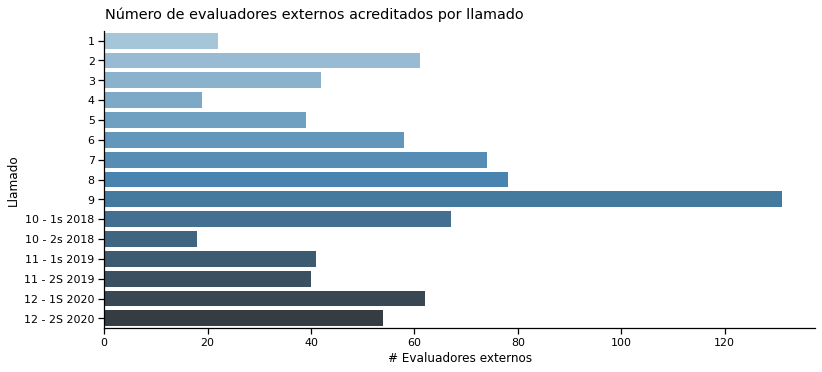

In [5]:
sns.set_context('notebook')
# g = sns.catplot(y='Región', data=df, kind='count', hue='Status', palette= 'Blues_d')
g = sns.catplot(y='Llamado', data=df, kind='count', palette= 'Blues_d')
g.fig.suptitle("Número de evaluadores externos acreditados por llamado", y=1.03)
g.set(ylabel="Llamado", xlabel="# Evaluadores externos") 
g.fig.set_size_inches(15,5)
plt.show()

### **3. Evaluadores por profesión**

In [6]:
df.loc[df["Profesión"].str.contains('rquit'), "Profesión (area)"] = "Arquitecto(a)"
df.loc[df["Profesión"].str.contains('ngenie'), "Profesión (area)"] = "Ingeniero(a)"
df.loc[df["Profesión"].str.contains('onstruct'), "Profesión (area)"] = "Constructor(a)"

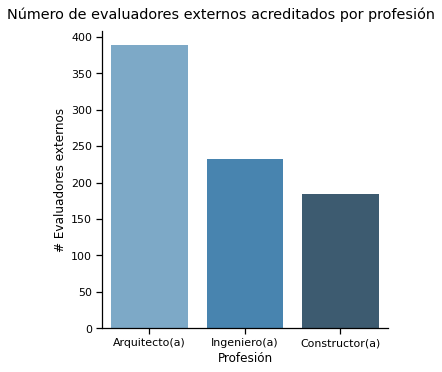

In [7]:
sns.set_context('notebook')
# g = sns.catplot(y='Región', data=df, kind='count', hue='Status', palette= 'Blues_d')
g = sns.catplot(x='Profesión (area)', data=df, kind='count', palette= 'Blues_d', order=["Arquitecto(a)", "Ingeniero(a)", "Constructor(a)"])
g.fig.suptitle("Número de evaluadores externos acreditados por profesión", y=1.03)
g.set(xlabel="Profesión", ylabel="# Evaluadores externos") 
# g.fig.set_size_inches(15,5)
plt.show()

In [8]:
print(f"Porcentage de evaluadores por profesión:")
df["Profesión (area)"].value_counts(normalize=True) * 100

Porcentage de evaluadores por profesión:


Arquitecto(a)    48.26
Ingeniero(a)     28.91
Constructor(a)   22.83
Name: Profesión (area), dtype: float64